# TFM - Walmart Sales Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)

In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
df_store = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
df_store.head() 

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_train = pd.read_csv('walmart-recruiting-store-sales-forecasting/train.csv/train.csv')
df_train.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df_features = pd.read_csv('walmart-recruiting-store-sales-forecasting/features.csv/features.csv')
df_features.head() 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## 1 Manipulación de datos

In [6]:
df_data = df_train.merge(df_features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(df_store, on=['Store'], how='inner')
df_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

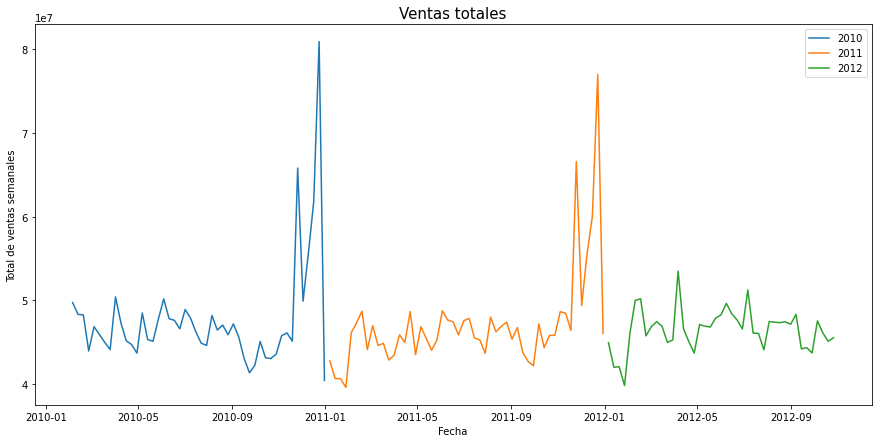

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(df_data.loc[df_data['Date'].dt.year==2010,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.plot(df_data.loc[df_data['Date'].dt.year==2011,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.plot(df_data.loc[df_data['Date'].dt.year==2012,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.xticks(rotation = 0, ha='center')
plt.title('Ventas totales',fontsize = 15)
plt.ylabel('Total de ventas semanales')
plt.xlabel('Fecha')
plt.legend(['2010', '2011', '2012'])
#ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
plt.show()

Se puede ver a través del gráfico de líneas que no hay tendencia en cuanto al año y que ningún evento aleatorio también ocurre en ningún año.
Además se puede ver que al final del año hay grandes ventas en comparación con otros meses, lo que indica que la Navidad y el Día de Acción de Gracias tienen más impacto en las ventas en comparación con el Super Bowl o día del trabajador.

In [9]:
df_data.corr()#.style.background_gradient(cmap ='coolwarm')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


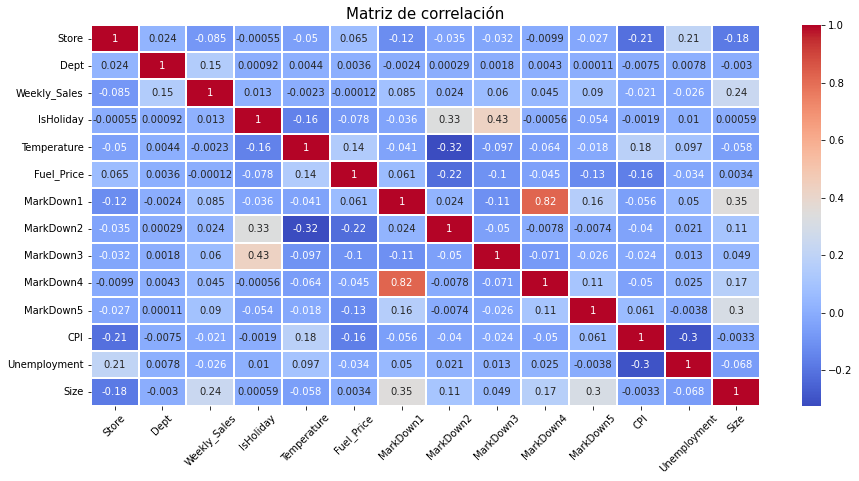

In [10]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(df_data.corr(),cmap ='coolwarm', linewidths = 0.30, annot = True)
plt.xticks(rotation = 45, ha='center')
plt.title('Matriz de correlación',fontsize = 15)
plt.show()

El tamaño está más correlacionado con Weekly_Sales
La mayoría de las características están correlacionadas con el tamaño, lo que no es bueno al predecir las ventas utilizando el aprendizaje automático ( Haga clic aquí para saber la razón). Por lo tanto, la mayoría de las características podrían ser inútiles y se pueden eliminar más tarde. : https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

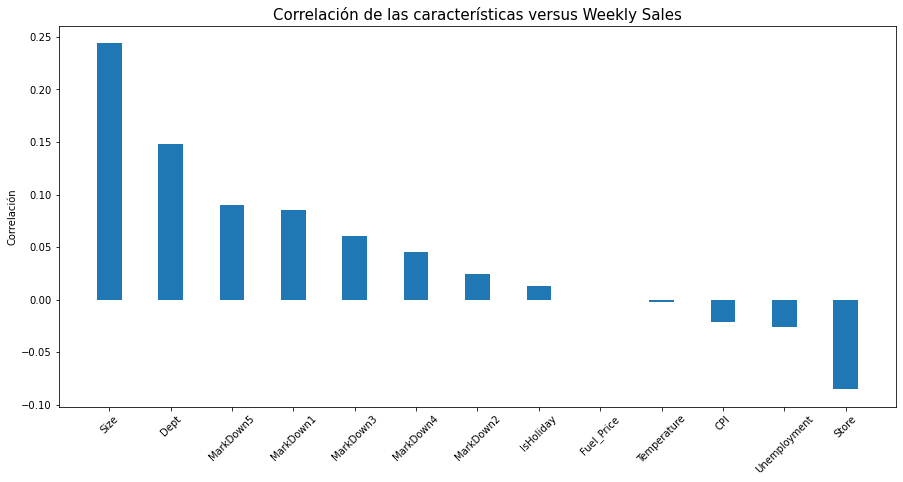

In [11]:
corr_wk_sales = df_data.corr()[['Weekly_Sales']].sort_values (by = 'Weekly_Sales', ascending = False).iloc[1:]
plt.figure(figsize=(15,7))
plt.bar(corr_wk_sales.index,corr_wk_sales.values.flatten(), width = 0.4 )
plt.ylabel('Correlación')
plt.xticks(rotation = 45, ha='center')
plt.title('Correlación de las características versus Weekly Sales',fontsize = 15)
plt.show()


## 2 Análisis de las características

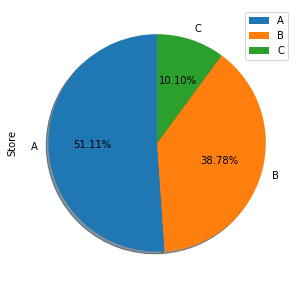

In [12]:
df_data.groupby(by='Type').count()[['Store']].plot(kind='pie',y='Store', shadow = True,startangle=90,figsize=(5,5), autopct='%1.2f%%')
plt.show()

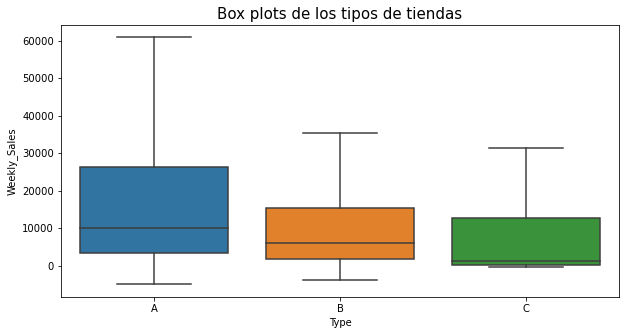

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data=df_data[['Type','Weekly_Sales']], x='Type', y='Weekly_Sales',showfliers = False)
plt.title('Box plots de los tipos de tiendas',fontsize = 15)
plt.show()

La mediana de cada tipo de tienda disminuye de izquierda a derecha, es decir, de la tienda A a C

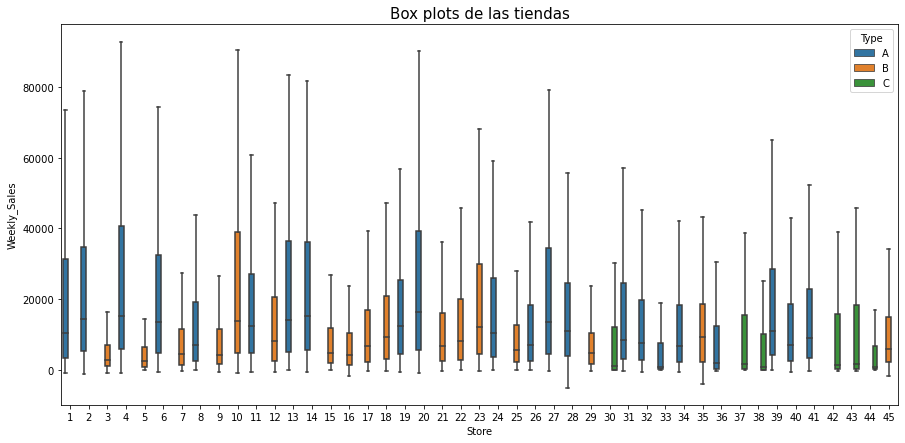

In [14]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_data[['Store','Weekly_Sales', 'Type']], x='Store', y='Weekly_Sales',hue='Type',showfliers = False)
plt.title('Box plots de las tiendas',fontsize = 15)
plt.show()

La característica de tienda es útil para predecir las ventas ya que cada tienda tiene una media diferente. Suposición: Esta característica comprende el departamento, el tamaño o el tipo y también la región que no se proporcionó en el conjunto de datos. Además la característica de la tienda combinada con el atributo de tipo también mejora la capacidad de predecir las ventas con mayor precisión, ya que se puede ver que el tipo A tiene mayores ventas en la mayor parte del tiendas.

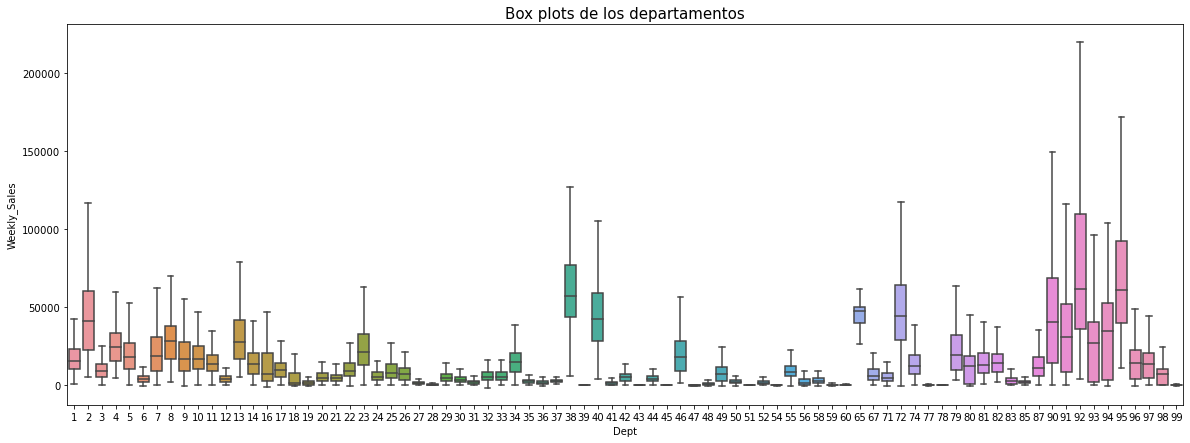

In [15]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_data[['Dept','Weekly_Sales', 'Type']], x='Dept',y='Weekly_Sales',showfliers = False)
plt.title('Box plots de los departamentos',fontsize = 15)
plt.show()

El departamento puede ser un factor en la predicción de ventas, ya que se puede ver a través de la trama de caja que cada departamento tiene una venta diferente a la de otros.

Text(0.5, 1.0, 'Box plots CPI')

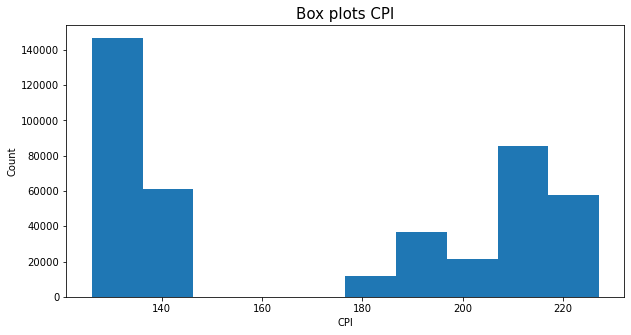

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df_data['CPI'])

plt.xlabel('CPI')
plt.ylabel('Count')
plt.title('Box plots CPI',fontsize = 15)

In [17]:
bins = np.linspace(min(df_data['CPI']), max(df_data['CPI']), num=6, endpoint=True, retstep=False, dtype=None, axis=0).tolist()
bins
group_names = ['[126-146]', '[146-166]','[166-186]', '[186-206]', '[206-227]']
df_data['CPI-category'] = pd.cut(df_data['CPI'], bins, labels=group_names, include_lowest=True )


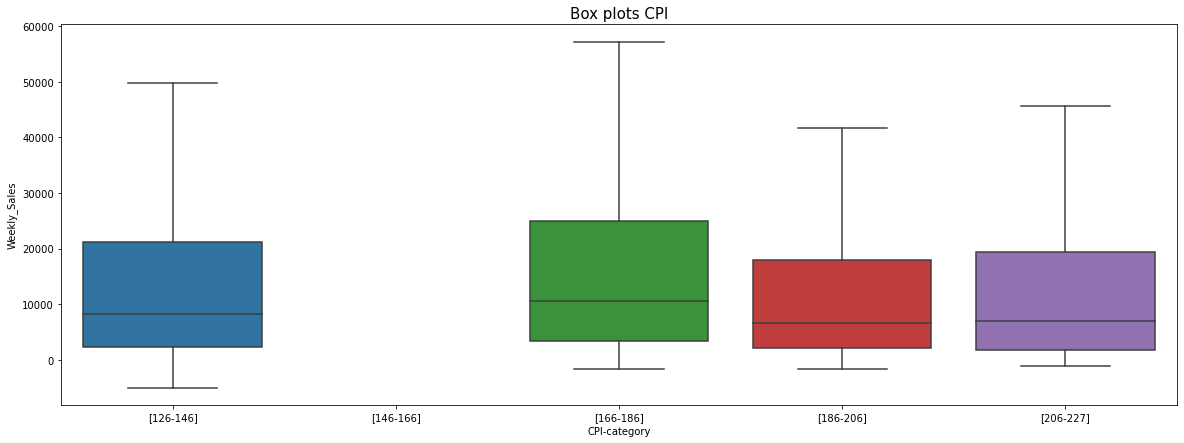

In [18]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_data[['CPI-category','Weekly_Sales', 'Type']], x='CPI-category',y='Weekly_Sales',showfliers = False)
plt.title('Box plots CPI',fontsize = 15)
plt.show()

Se aprecia que no hay datos entre el IPC de 146 a 170, por lo que no hay ventas.

Text(0.5, 1.0, 'Histograma precio de combustible')

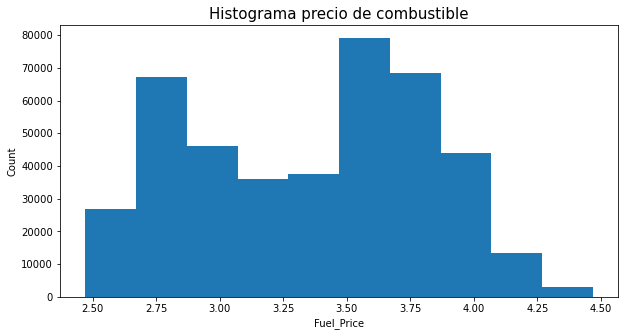

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df_data['Fuel_Price'])

plt.xlabel('Fuel_Price')
plt.ylabel('Count')
plt.title('Histograma precio de combustible',fontsize = 15)

[2.472, 2.8712, 3.2704, 3.6696, 4.0687999999999995, 4.468]


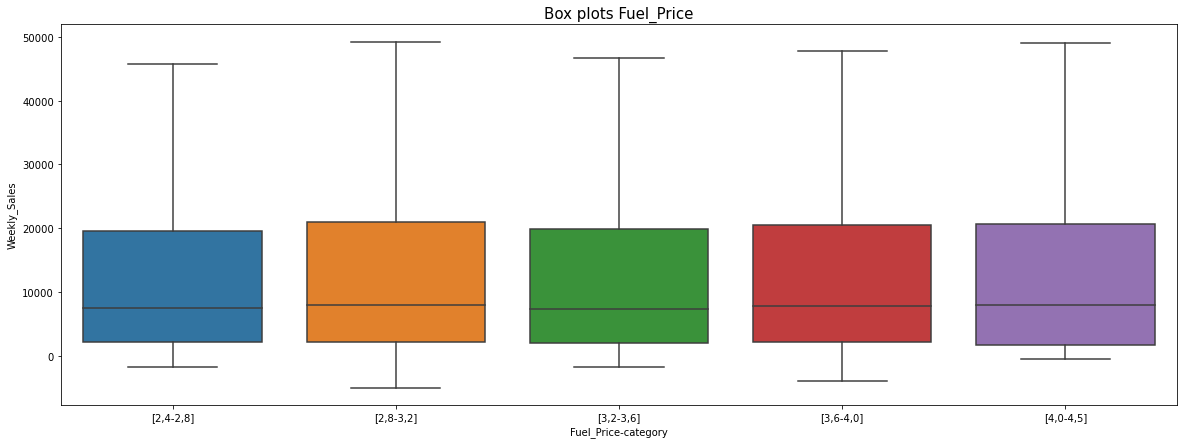

In [20]:
bins = np.linspace(min(df_data['Fuel_Price']), max(df_data['Fuel_Price']), num=6, endpoint=True, retstep=False, dtype=None, axis=0).tolist()
print(bins)
group_names = ['[2,4-2,8]', '[2,8-3,2]','[3,2-3,6]', '[3,6-4,0]', '[4,0-4,5]']
df_data['Fuel_Price-category'] = pd.cut(df_data['Fuel_Price'], bins, labels=group_names, include_lowest=True )
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_data[['Fuel_Price-category','Weekly_Sales', 'Type']], x='Fuel_Price-category',y='Weekly_Sales',showfliers = False)
plt.title('Box plots Fuel_Price',fontsize = 15)
plt.show()

El precio del combustible tiene muy poco impacto en las ventas, ya que no hay cambios en las ventas con el aumento en el precio del combustible. Por lo tanto, esta característica también se puede eliminar.

Text(0.5, 1.0, 'Histograma precio de Temperatura')

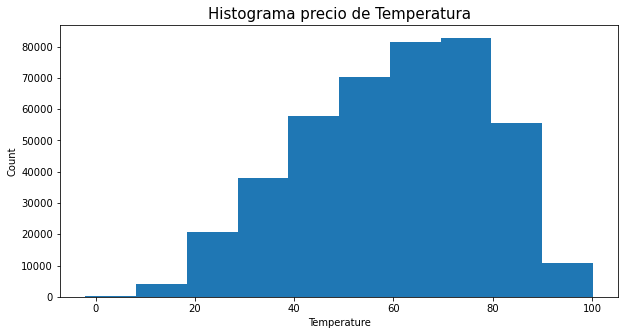

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(df_data['Temperature'])

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histograma precio de Temperatura',fontsize = 15)

[-2.06, 18.380000000000003, 38.82, 59.260000000000005, 79.7, 100.14]


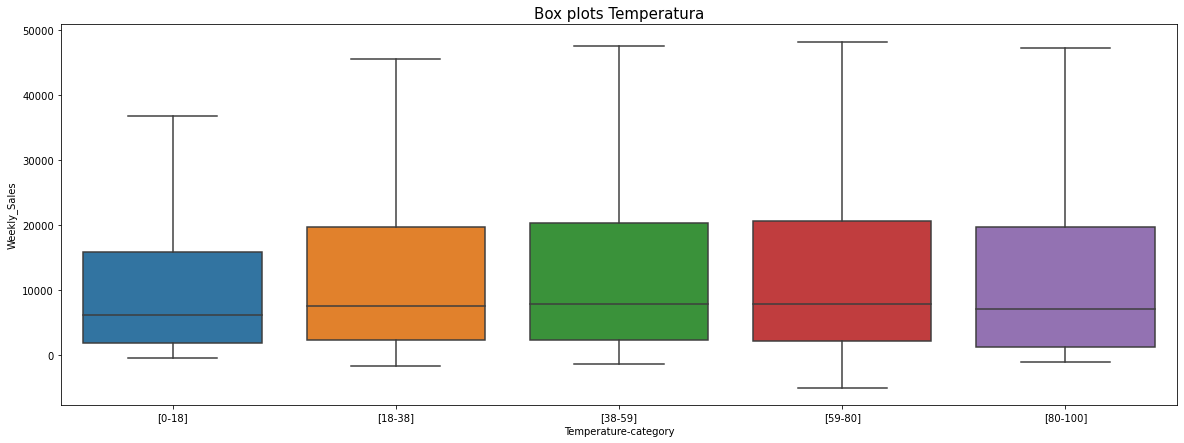

In [22]:
bins = np.linspace(min(df_data['Temperature']), max(df_data['Temperature']), num=6, endpoint=True, retstep=False, dtype=None, axis=0).tolist()
print(bins)
group_names = ['[0-18]', '[18-38]','[38-59]', '[59-80]', '[80-100]']
df_data['Temperature-category'] = pd.cut(df_data['Temperature'], bins, labels=group_names, include_lowest=True )
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_data[['Temperature-category','Weekly_Sales', 'Type']], x='Temperature-category',y='Weekly_Sales',showfliers = False)
plt.title('Box plots Temperatura',fontsize = 15)
plt.show()

Esta característica también se puede eliminar ya que no hay cambios en las ventas en ningún rango de temperatura.

Text(0.5, 1.0, 'Histograma precio de desempleo')

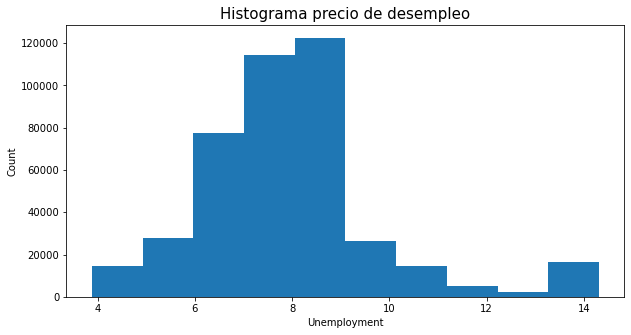

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df_data['Unemployment'])

plt.xlabel('Unemployment')
plt.ylabel('Count')
plt.title('Histograma precio de desempleo',fontsize = 15)

[3.879, 5.9658, 8.0526, 10.1394, 12.2262, 14.313]


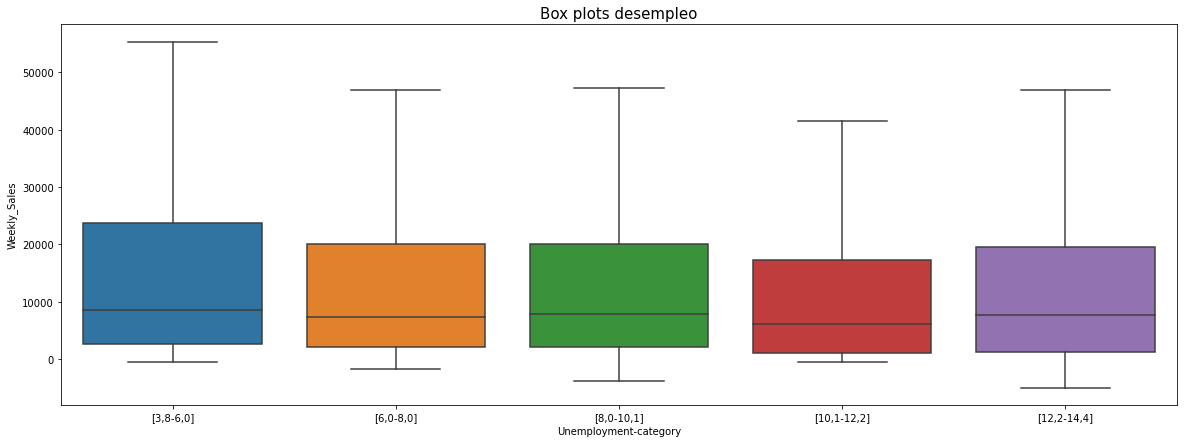

In [24]:
bins = np.linspace(min(df_data['Unemployment']), max(df_data['Unemployment']), num=6, endpoint=True, retstep=False, dtype=None, axis=0).tolist()
print(bins)
group_names = ['[3,8-6,0]', '[6,0-8,0]','[8,0-10,1]', '[10,1-12,2]', '[12,2-14,4]']
df_data['Unemployment-category'] = pd.cut(df_data['Unemployment'], bins, labels=group_names, include_lowest=True )
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_data[['Unemployment-category','Weekly_Sales', 'Type']], x='Unemployment-category',y='Weekly_Sales',showfliers = False)
plt.title('Box plots desempleo',fontsize = 15)
plt.show()

Esta característica también se puede eliminar ya que no hay cambios en las ventas en ningún rango de desempleo.

##### Ventas negativas

In [25]:
print(f'Las filas con ventas negativas y sin ventas suponen el{len(df_data.loc[df_data["Weekly_Sales"]<=0])/len(df_data): .2%} de los casos, por lo que elimino las siguientes filas.' )
df_data.loc[df_data["Weekly_Sales"]<=0]

Las filas con ventas negativas y sin ventas suponen el 0.32% de los casos, por lo que elimino las siguientes filas.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,CPI-category,Fuel_Price-category,Temperature-category,Unemployment-category
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,[206-227],"[2,4-2,8]",[38-59],"[8,0-10,1]"
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,[206-227],"[2,4-2,8]",[38-59],"[8,0-10,1]"
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315,[206-227],"[2,4-2,8]",[59-80],"[6,0-8,0]"
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315,[206-227],"[2,8-3,2]",[38-59],"[6,0-8,0]"
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315,[206-227],"[3,2-3,6]",[38-59],"[6,0-8,0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221,[186-206],"[3,6-4,0]",[59-80],"[8,0-10,1]"
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221,[186-206],"[3,2-3,6]",[59-80],"[8,0-10,1]"
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221,[186-206],"[3,2-3,6]",[59-80],"[8,0-10,1]"
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221,[186-206],"[3,6-4,0]",[59-80],"[8,0-10,1]"


In [26]:
df_data= df_data.loc[df_data['Weekly_Sales']>0]

In [27]:
df_data = df_data.drop(columns=['Temperature','Fuel_Price','CPI','Unemployment','CPI-category','Fuel_Price-category','Temperature-category','Unemployment-category','Store','Dept'])
df_data.head()

,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size
0,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,A,151315
1,2010-02-05,50605.27,False,NaN,NaN,NaN,NaN,NaN,A,151315
2,2010-02-05,13740.12,False,NaN,NaN,NaN,NaN,NaN,A,151315
3,2010-02-05,39954.04,False,NaN,NaN,NaN,NaN,NaN,A,151315
4,2010-02-05,32229.38,False,NaN,NaN,NaN,NaN,NaN,A,151315


## Prophet

In [28]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [29]:
type_group = {'A':1, 'B': 2, 'C': 3}  
df_data['Type'] = df_data['Type'].replace(type_group)
df_data = df_data.groupby(by=['Date','Type','Size']).agg({
    'Weekly_Sales':'sum',
    'IsHoliday':'max',  
}).reset_index()
df_data.head()

,Date,Type,Size,Weekly_Sales,IsHoliday
0,2010-02-05,1,39690,274593.43,False
1,2010-02-05,1,39910,467546.74,False
2,2010-02-05,1,151315,1643690.90,False
3,2010-02-05,1,152513,1034153.21,False
4,2010-02-05,1,155078,1004137.09,False


In [30]:
df_data['week'] = df_data['Date'].dt.isocalendar().week
df_data['year'] = df_data['Date'].dt.isocalendar().year
df_data.head()

,Date,Type,Size,Weekly_Sales,IsHoliday,week,year
0,2010-02-05,1,39690,274593.43,False,5,2010
1,2010-02-05,1,39910,467546.74,False,5,2010
2,2010-02-05,1,151315,1643690.90,False,5,2010
3,2010-02-05,1,152513,1034153.21,False,5,2010
4,2010-02-05,1,155078,1004137.09,False,5,2010


In [31]:
ts = df_data.groupby(by=['Date']).agg({'Weekly_Sales':'sum'})
ts.head()

,Weekly_Sales
Date,
2010-02-05,49750875.98
2010-02-12,48336800.10
2010-02-19,48277902.33
2010-02-26,43970440.65
2010-03-05,46872715.16


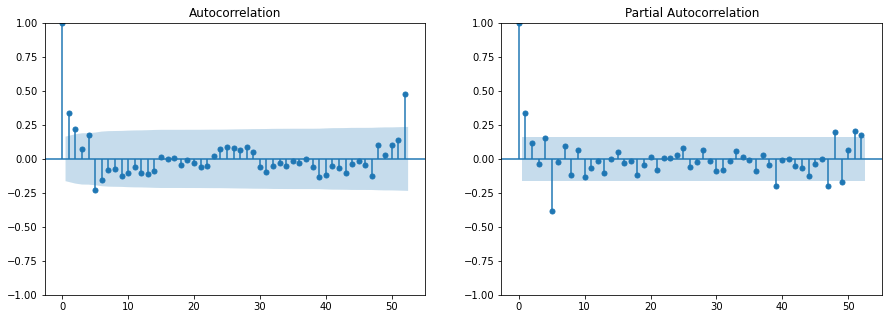

In [32]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

fig, axes = plt.subplots(1,2, figsize=(15,5))
_ = plot_acf(ts, lags=52, ax=axes[0])
_ = plot_pacf(ts,method='ywm', lags=52, ax=axes[1])


La mayor autocorrelación se da a las 52 semanas que corresponde al ciclo anual

In [33]:
roll_mean = ts['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = ts['Weekly_Sales'].rolling(window=2, center=False).std()

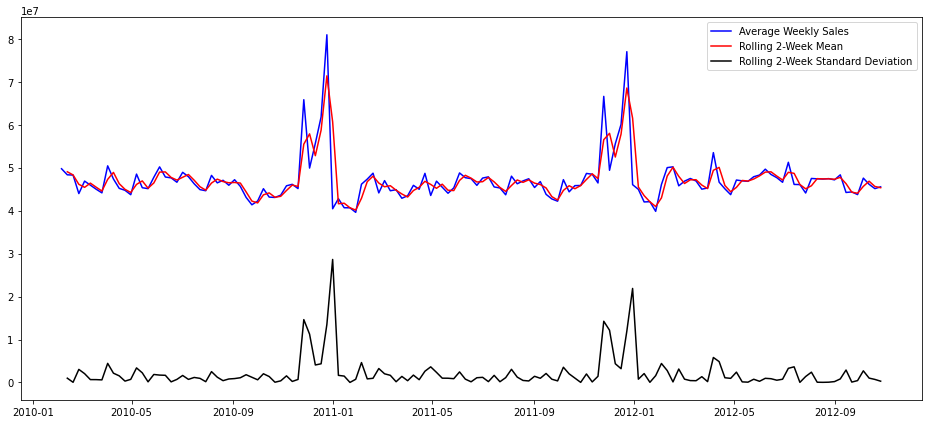

In [34]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(ts['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [35]:
adfuller = adfuller(ts['Weekly_Sales'])

In [36]:
print (f' adf :{adfuller[0]}\n pvalue : {adfuller[1]}\n usedlag: {adfuller[2]}\n nobs: {adfuller[3]}\n critical values: {adfuller[4]}\n'   )

 adf :-5.908397717797432
 pvalue : 2.674606788825844e-07
 usedlag: 4
 nobs: 138
 critical values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}



https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

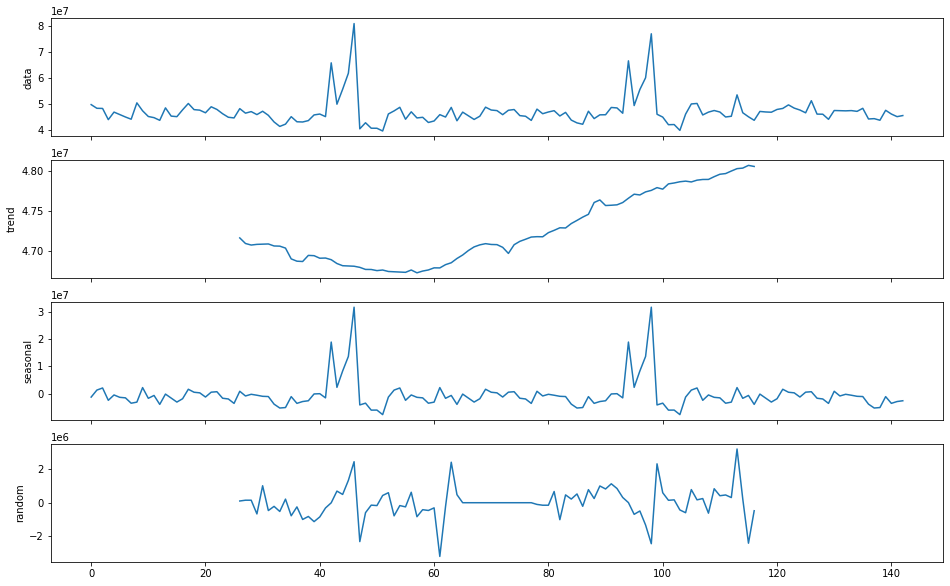

In [37]:
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
decomposed = decompose(ts['Weekly_Sales'].values, 'additive', m=52)
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

https://mlstudio.jaol.net/arima-model-time-series-forecasting-python/

In [38]:
labor_day = pd.DataFrame({
    'holiday':'labor day',
    'ds':pd.to_datetime(['2010-09-10','2011-09-09','2012-09-07','2013-09-06']),
    'lower_window': 0,
    'upper_window': 0
})
thanksgiving = pd.DataFrame({
    'holiday':'thanksgiving',
    'ds':pd.to_datetime(['2010-11-26','2011-11-25','2012-11-23','2013-11-29']),
    'lower_window': 0,
    'upper_window': 1
})
christmas = pd.DataFrame({
    'holiday':'christmas',
    'ds':pd.to_datetime(['2010-12-31','2011-12-30','2012-12-28','2013-12-27']),
    'lower_window': -1,
    'upper_window': 0
})
superbowl = pd.DataFrame({
    'holiday':'superbowl',
    'ds':pd.to_datetime(['2010-02-12','2011-02-11','2012-02-10','2013-02-08']),
    'lower_window': 0,
    'upper_window': 1
})
holidays = pd.concat([labor_day,thanksgiving,christmas,superbowl])

In [39]:
df_data['IsHoliday'] = df_data['IsHoliday'].astype(int)
X_train_ph = df_data[df_data['Date']<'05-02-2012'].copy()
X_test_ph = df_data[df_data['Date']>='05-02-2012'].copy()

In [40]:
X_train_ph = X_train_ph.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})
X_test_ph = X_test_ph.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})
X_train_ph = X_train_ph.reindex(columns=['ds', 'y', 'Type', 'Size', 'IsHoliday']).copy()
X_test_ph = X_test_ph.reindex(columns=['ds', 'y', 'Type', 'Size', 'IsHoliday']).copy()

In [41]:
regresores = [c for c in X_train_ph.columns if c not in ['ds', 'y'] ]
regresores

['Type', 'Size', 'IsHoliday']

In [42]:
from dask.distributed import Client
import itertools
client = Client() 

In [58]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale':[0.1, 1, 10.0],
    'growth': ['linear']
}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mae = []  

In [59]:
X_train_ph

,ds,y,Type,Size,IsHoliday
0,2010-02-05,274593.43,1,39690,0
1,2010-02-05,467546.74,1,39910,0
2,2010-02-05,1643690.90,1,151315,0
3,2010-02-05,1034153.21,1,152513,0
4,2010-02-05,1004137.09,1,155078,0
...,...,...,...,...,...
4909,2012-04-27,674829.58,2,140167,0
4910,2012-04-27,946590.26,3,39690,0
4911,2012-04-27,859155.69,3,39910,0
4912,2012-04-27,593138.59,3,41062,0


In [45]:
X_train_ph = X_train_ph.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

In [62]:
m = Prophet()
m.fit(X_train_ph)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [63]:
future = m.make_future_dataframe(periods=52, freq='w')

In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
164,2013-03-24,1.117081e+06,305696.901961,1.910169e+06
165,2013-03-31,1.132684e+06,358822.653588,1.931443e+06
166,2013-04-07,1.159655e+06,410118.136410,1.900245e+06
167,2013-04-14,1.166865e+06,471207.694046,1.935452e+06
168,2013-04-21,1.140770e+06,397162.456075,1.886267e+06


In [ ]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

for params in all_params:
    m = Prophet(holidays=holidays, **params)
    
    for r in regresores:
        m.add_regressor(r, mode='additive')
        
    m.add_seasonality(name='yearly', period=366, fourier_order=5) 
    m.fit(X_train_ph)
    df_cv = cross_validation(m, initial='366 days', period='30 days', horizon = '365 days', parallel="dask")
    df_p = performance_metrics(df_cv)
    mae.append(df_p['mae'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['MAE'] = mae
print(tuning_results)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 3 forecasts with cutoffs between 2011-02-27 00:00:00 and 2011-04-28 00:00:00
INFO:prophet:Applying in parallel with <Client: 'tcp://127.0.0.1:56824' processes=4 threads=8, memory=7.88 GiB>
IN

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                   0.1   
1                     0.001                     0.01                   1.0   
2                     0.001                     0.01                  10.0   
3                     0.001                     0.10                   0.1   
4                     0.001                     0.10                   1.0   
..                      ...                      ...                   ...   
43                    0.500                     1.00                   1.0   
44                    0.500                     1.00                  10.0   
45                    0.500                    10.00                   0.1   
46                    0.500                    10.00                   1.0   
47                    0.500                    10.00                  10.0   

    growth            MAE  
0   linear  697477.219272  
1   lin

In [116]:
tuning_results.loc[(tuning_results['changepoint_prior_scale']==0.001) & (tuning_results['seasonality_prior_scale']==0.01)& (tuning_results['holidays_prior_scale']==0.1)]

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,growth,MAE
0,0.001,0.01,0.1,linear,697477.219272


In [70]:
best_params = all_params[np.argmin(mae)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'growth': 'linear'}


In [71]:
future = m.make_future_dataframe(periods=52, freq='w')
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
164,2013-03-24
165,2013-03-31
166,2013-04-07
167,2013-04-14


In [96]:
X_test_ph.iloc[20:40]

,ds,y,Type,Size,IsHoliday
4934,2012-05-04,1995994.51,1,219622,0
4935,2012-05-04,360940.66,2,34875,0
4936,2012-05-04,439913.57,2,37392,0
4937,2012-05-04,426968.74,2,57197,0
4938,2012-05-04,465198.89,2,70713,0
4939,2012-05-04,930121.14,2,93188,0
4940,2012-05-04,504963.84,2,93638,0
4941,2012-05-04,772117.77,2,103681,0
4942,2012-05-04,1073433.69,2,112238,0
4943,2012-05-04,1317393.46,2,114533,0


In [75]:
forecast = m.predict(X_test_ph)

C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


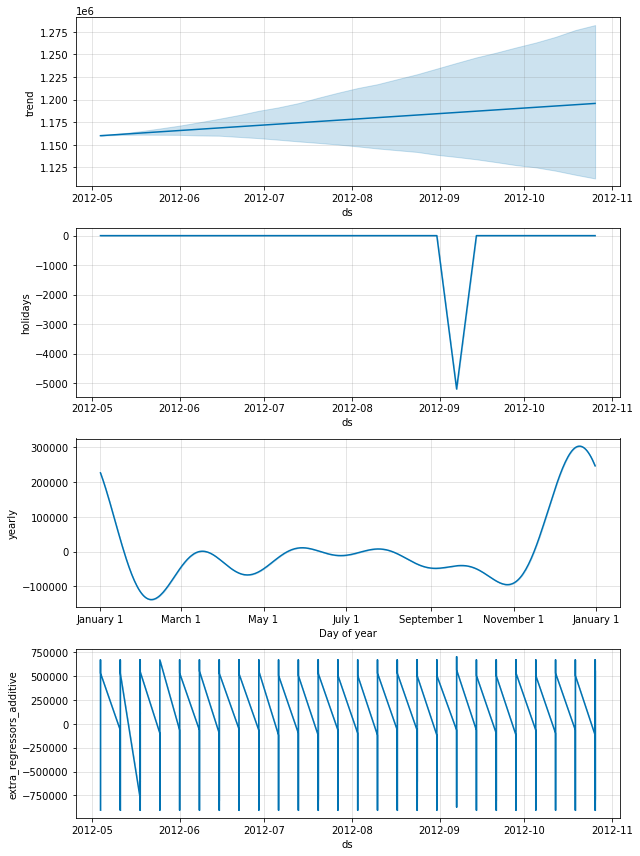

In [76]:
fig = m.plot_components(forecast)

In [107]:
pd.concat([X_test_ph.reset_index(),forecast[['yhat']]], axis=1).assign(mae=lambda df : abs(df.y- df.yhat)).mean()

C:\Users\ulise\AppData\Local\Temp\ipykernel_21416\1033158990.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  pd.concat([X_test_ph.reset_index(),forecast[['yhat']]], axis=1).assign(mae=lambda df : abs(df.y- df.yhat)).mean()


index        5.459500e+03
y            1.116078e+06
Type         1.595238e+00
Size         1.328458e+05
IsHoliday    3.846154e-02
yhat         1.152954e+06
mae          7.119275e+05
dtype: float64

### Randon Forest

In [56]:
df_data['IsHoliday'] = df_data['IsHoliday'].astype(int)
X_train_rf = df_data[df_data['Date']<'05-02-2012'].drop(columns=['Weekly_Sales','Date']).copy()
y_train_rf= df_data[df_data['Date']<'05-02-2012']['Weekly_Sales'].copy()
X_test_rf = df_data[df_data['Date']>='05-02-2012'].drop(columns=['Weekly_Sales','Date']).copy()
y_test_rf= df_data[df_data['Date']>='05-02-2012']['Weekly_Sales'].copy()

In [56]:
num_features = X_train_rf.select_dtypes(include=np.number).columns.to_list()
cat_features = X_train_rf.select_dtypes(exclude=np.number).columns.to_list()

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('scaler', StandardScaler())
    ])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
pipe_transf = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
        ])

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rforest_model = RandomForestRegressor();

pipe_transf_rforest = Pipeline([
    ('prep', pipe_transf),
    ('clas', rforest_model)
    ])

parameters = {}
parameters['clas__n_estimators'] = [2,10,50, 100]
parameters['clas__max_depth'] = [5,10,15]

search = GridSearchCV(pipe_transf_rforest, param_grid = parameters , cv=3)
search.fit(X_train_rf,y_train_rf)
print(search.best_params_, end='\n\n')

{'clas__max_depth': 15, 'clas__n_estimators': 100}



In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
model=search.best_estimator_
train_mae = mean_absolute_error(y_train_rf, model.predict(X_train_rf))
test_mae = mean_absolute_error(y_test_rf, model.predict(X_test_rf))
print(train_mae)
print(test_mae)

23849.453390137827
49895.35883217328


(4914, 5)
(4914, 1)
